# MFIT5004 Data Mining Group Project

### 1. Import Packages


In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from plotnine import *
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### 2. Import data

In [2]:
data = pd.read_csv("dataset.csv")

### 3. Exploratory Data Analysis


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [4]:
data.shape

(6362620, 11)

### 4. Deal with missing value

In [5]:
#find NaN
data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

### 5. Feature analysis

#### 5.1 isFraud(response)

In [6]:
#feature analysis
#1. isFraud
print(len(data.isFraud[data.isFraud==0]))
print(len(data.isFraud[data.isFraud==1]))


6354407
8213


#### 5.2 step

In [7]:
#create Time_in_day and Day_in_week
data["Time_in_day"] = data.step % 24
data["Day_in_week"] = (data.step/24).apply(math.ceil)%7

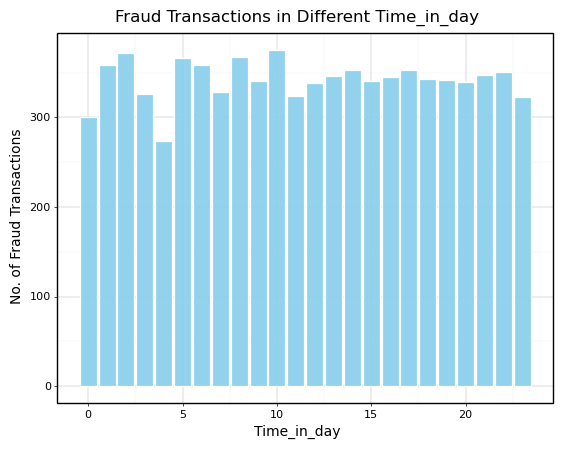

<ggplot: (138797150100)>

In [8]:
# data.Time_in_day[data.isFraud==1].hist(bins =24)
# plt.title("Fraud Transactions in Different Time_in_day")
# plt.xlabel("Time_in_day")
# plt.ylabel("No. of Fraud Transactions")




(ggplot(data[data.isFraud==1], aes(x = 'Time_in_day', fill = 'Time_in_day')) +
        geom_bar(color="white", fill="skyblue",alpha=0.9)+ 
        labs(title = "Fraud Transactions in Different Time_in_day", x = "Time_in_day", y= 'No. of Fraud Transactions') +
        theme_linedraw(base_size = 10, base_family = "DejaVu Sans"))

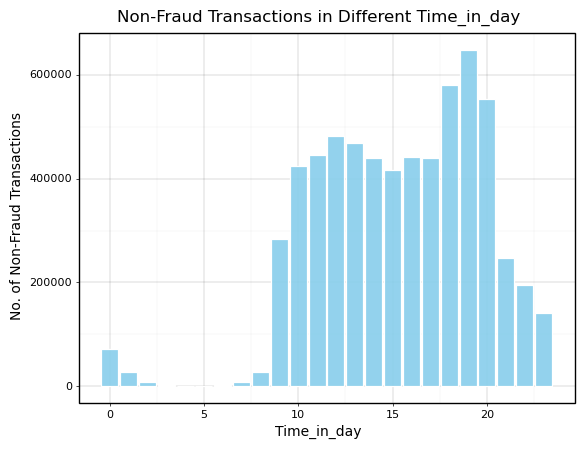

<ggplot: (138797816158)>

In [9]:
(ggplot(data[data.isFraud==0], aes(x = 'Time_in_day', fill = 'Time_in_day')) +
        geom_bar(color="white", fill="skyblue",alpha=0.9)+ 
        labs(title = "Non-Fraud Transactions in Different Time_in_day", x = "Time_in_day", y= 'No. of Non-Fraud Transactions') +
        theme_linedraw(base_size = 10, base_family = "DejaVu Sans"))

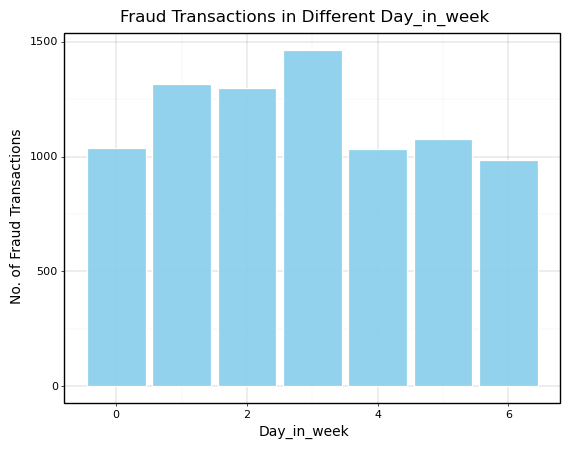

<ggplot: (138797748914)>

In [10]:
(ggplot(data[data.isFraud==1], aes(x = 'Day_in_week', fill = 'Day_in_week')) +
        geom_bar(color="white", fill="skyblue",alpha=0.9)+ 
        labs(title = "Fraud Transactions in Different Day_in_week", x = "Day_in_week", y= 'No. of Fraud Transactions') +
        theme_linedraw(base_size = 10, base_family = "DejaVu Sans"))


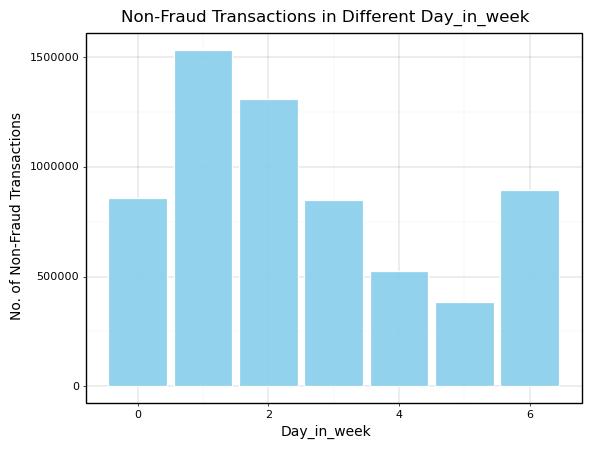

<ggplot: (138797784173)>

In [11]:
(ggplot(data[data.isFraud==0], aes(x = 'Day_in_week', fill = 'Day_in_week')) +
        geom_bar(color="white", fill="skyblue",alpha=0.9)+ 
        labs(title = "Non-Fraud Transactions in Different Day_in_week", x = "Day_in_week", y= 'No. of Non-Fraud Transactions') +
        theme_linedraw(base_size = 10, base_family = "DejaVu Sans"))

#### 5.3 type

In [12]:
#3.type
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
data[data.isFraud==1]["type"].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [14]:
#delete other unrelated data
data = data[(data.type =="CASH_OUT") | (data.type == "TRANSFER")]

#### 5.4 Amount

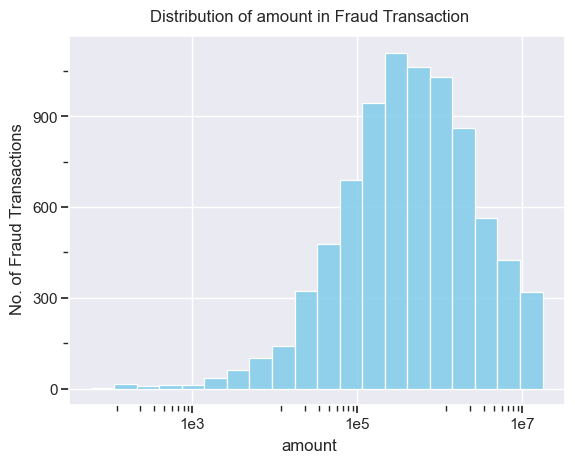

<ggplot: (138797865201)>

In [15]:
(ggplot(data[data.isFraud==1], aes(x = 'amount')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of amount in Fraud Transaction", x = "amount", y= 'No. of Fraud Transactions') +
        theme_seaborn()+scale_x_log10())

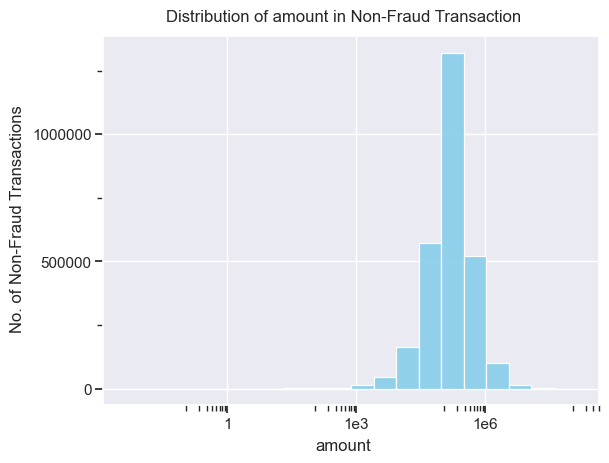

<ggplot: (138797982151)>

In [16]:
(ggplot(data[data.isFraud==0], aes(x = 'amount')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of amount in Non-Fraud Transaction", x = "amount", y= 'No. of Non-Fraud Transactions') +
        theme_seaborn() + scale_x_log10())

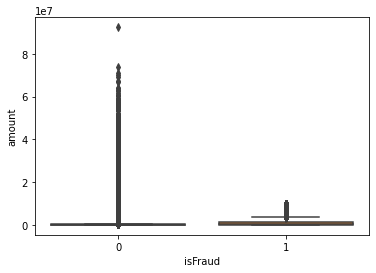

In [17]:
sns.boxplot(x="isFraud", y="amount", data = data)
plt.show()

#### 5.5 nameOrig & nameDest

In [18]:
#5. nameOrig & nameDest
data["account_type"] = data.nameOrig.str[0]+data.nameDest.str[0]
data["account_type"].value_counts()

CC    2770409
Name: account_type, dtype: int64

#### 5.6 oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

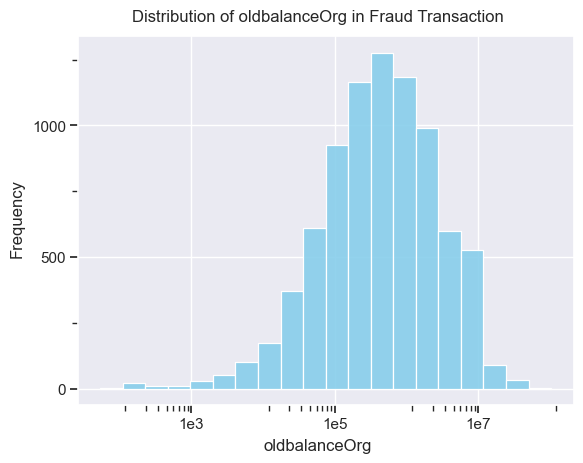

<ggplot: (138949195024)>

In [19]:
# 6.oldbalanceOrg, newbalanceOrig, oldbalanceDest,newbalanceDest
(ggplot(data[data.isFraud==1], aes(x = 'oldbalanceOrg')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of oldbalanceOrg in Fraud Transaction", x = "oldbalanceOrg", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

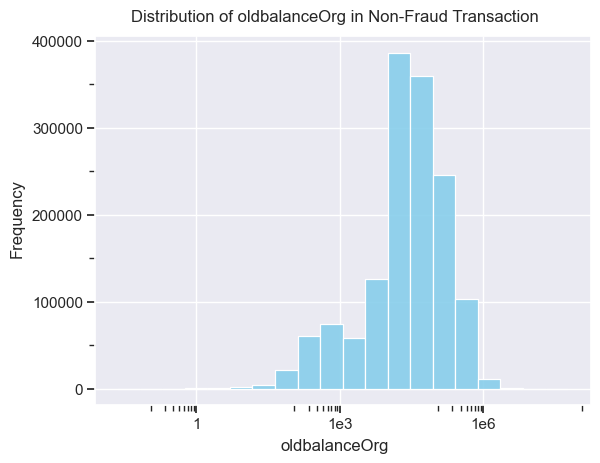

<ggplot: (138949196870)>

In [20]:
(ggplot(data[data.isFraud==0], aes(x = 'oldbalanceOrg')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of oldbalanceOrg in Non-Fraud Transaction", x = "oldbalanceOrg", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

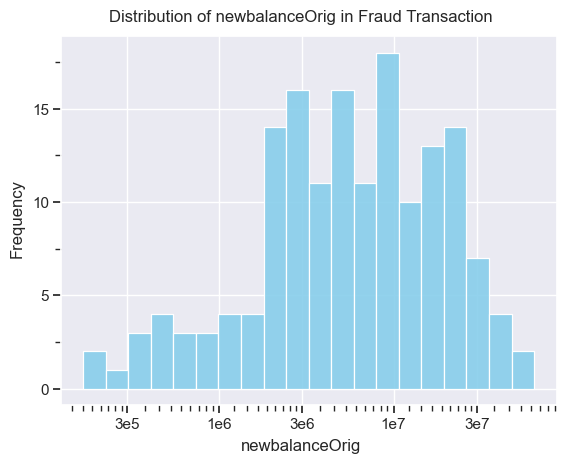

<ggplot: (138797751315)>

In [21]:
(ggplot(data[data.isFraud==1], aes(x = 'newbalanceOrig')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of newbalanceOrig in Fraud Transaction", x = "newbalanceOrig", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

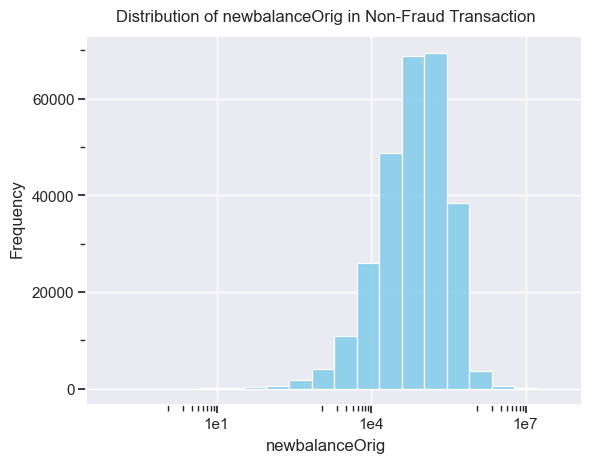

<ggplot: (138798405867)>

In [22]:
(ggplot(data[data.isFraud==0], aes(x = 'newbalanceOrig')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of newbalanceOrig in Non-Fraud Transaction", x = "newbalanceOrig", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

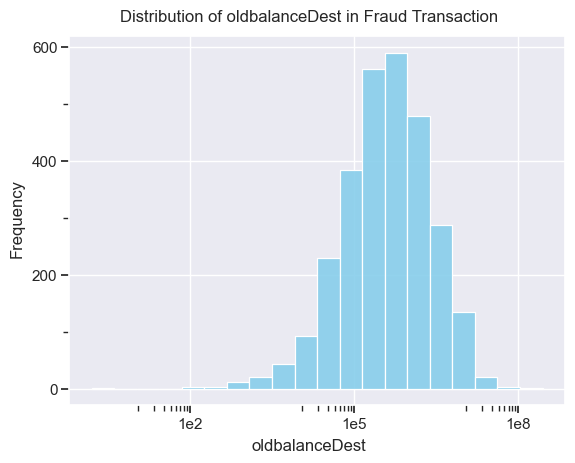

<ggplot: (138798540005)>

In [23]:
(ggplot(data[data.isFraud==1], aes(x = 'oldbalanceDest')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of oldbalanceDest in Fraud Transaction", x = "oldbalanceDest", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

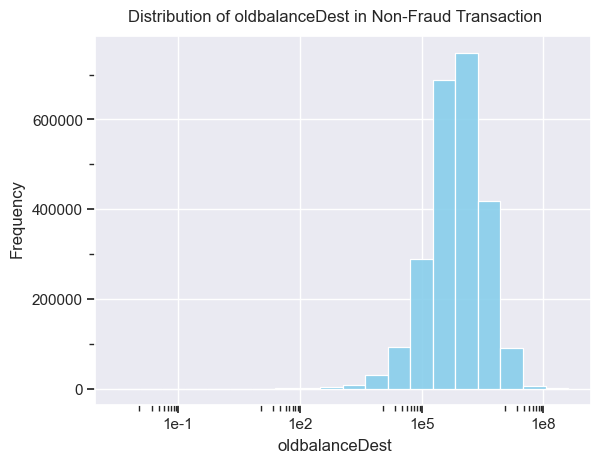

<ggplot: (138798581757)>

In [24]:
(ggplot(data[data.isFraud==0], aes(x = 'oldbalanceDest')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of oldbalanceDest in Non-Fraud Transaction", x = "oldbalanceDest", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

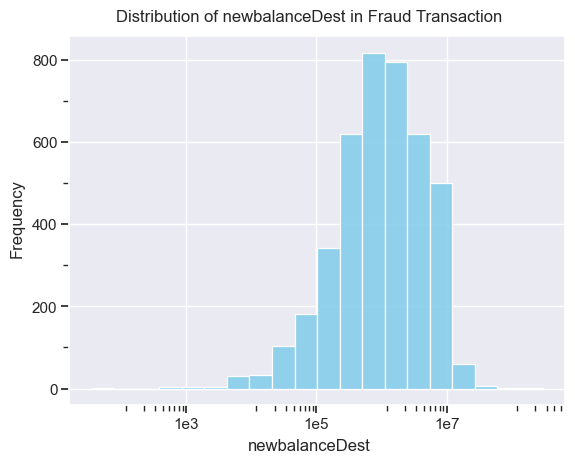

<ggplot: (138798704893)>

In [25]:
(ggplot(data[data.isFraud==1], aes(x = 'newbalanceDest')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of newbalanceDest in Fraud Transaction", x = "newbalanceDest", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

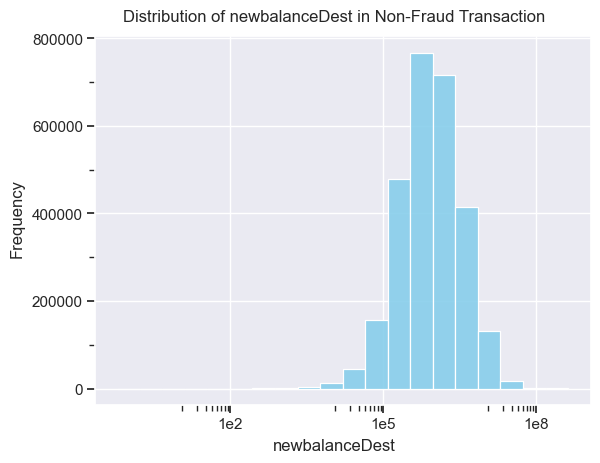

<ggplot: (138798980084)>

In [26]:
(ggplot(data[data.isFraud==0], aes(x = 'newbalanceDest')) + geom_histogram(bins=20, color="white", fill="skyblue",alpha=0.9) +
        labs(title = "Distribution of newbalanceDest in Non-Fraud Transaction", x = "newbalanceDest", y= 'Frequency') +
        theme_seaborn() + scale_x_log10())

In [27]:
#Find some errors in transactions

In [28]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  94.0
Percentage of observations with balance errors in the account receiving money:  42.0


In [29]:
# adding features errorBalanceOrg, errorBalanceDest
data["errorBalanceOrg"] = data.newbalanceOrig + data.amount - data.oldbalanceOrg
data["errorBalanceDest"] = data.oldbalanceDest + data.amount - data.newbalanceDest


### 6. Get Training Data

In [30]:
#Categorical Data
data = data.join(pd.get_dummies(data['type']))
#one-hot

In [31]:
#Training, testing data split
#predictors
X = data[["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","Time_in_day","Day_in_week","errorBalanceOrg","errorBalanceDest","CASH_OUT","TRANSFER"]]
#change the isFraud to NonFraud
data["notFraud"]=0
data["notFraud"][data["isFraud"]==0]=1
#response
y = data["notFraud"]
#split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 42)

In [32]:
#check the training set
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Time_in_day,Day_in_week,errorBalanceOrg,errorBalanceDest,CASH_OUT,TRANSFER
1326860,137,256796.36,0.00,0.00,826969.43,1083765.80,17,6,256796.36,-1.000000e-02,1,0
3095732,235,76426.86,20808.00,0.00,398149.07,474575.92,19,3,55618.86,1.000000e-02,1,0
4353969,309,173912.66,0.00,0.00,465746.64,639659.30,21,6,173912.66,0.000000e+00,1,0
529479,20,197978.48,204571.00,6592.52,0.00,197978.48,20,1,0.00,0.000000e+00,1,0
3996516,298,352228.73,1484.00,0.00,163019.07,515247.80,10,6,350744.73,0.000000e+00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3864478,283,99368.91,85416.00,0.00,1258118.85,1357487.77,19,5,13952.91,-1.000000e-02,1,0
5393590,377,143543.26,9021.00,0.00,1021168.59,1164711.85,17,2,134522.26,0.000000e+00,1,0
5092890,355,108673.92,73166.00,0.00,86356.64,195030.55,19,1,35507.92,1.000000e-02,1,0
6358039,711,986623.96,986623.96,0.00,0.00,0.00,15,2,0.00,9.866240e+05,0,1


In [33]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 7. Performance analysis function

In [34]:
def results(y_train, y_train_predict, y_test, y_test_predict,normalize=False):
    print('train_accuracy:',accuracy_score(y_train, y_train_predict))
    print('test_accuracy:',accuracy_score(y_test, y_test_predict))
    print(classification_report(y_test,y_test_predict))

### 8.KNN

In [ ]:
# Find the optimal parameters for KNN model 
Model_KNN = KNeighborsClassifier()
param_grids  = {'n_neighbors':(3,5,7,9),'weights':['distance','uniform']}
GridSearch_KNN = GridSearchCV(estimator = Model_KNN, param_grid=param_grids, cv=3, verbose=1,scoring='roc_auc')

GridSearch_KNN.fit(X_train, y_train)

print('Best Parameters for KNN Model')
print(GridSearch_KNN.best_params_)

In [ ]:
# The best KNN Model
Model_KNN = KNeighborsClassifier(n_neighbors=9,weights='distance')

# Fit the best KNN model to the training set
Model_KNN.fit(X_train, y_train)

# Get the predicted value
y_train_pred = Model_KNN.predict(X_train)
y_test_pred = Model_KNN.predict(X_test)

train_accuracy: 1.0
test_accuracy: 0.9990380485198942
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       0.99      0.85      0.91    554082
weighted avg       1.00      1.00      1.00    554082



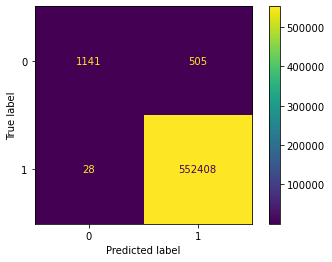

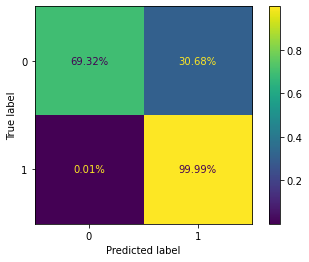

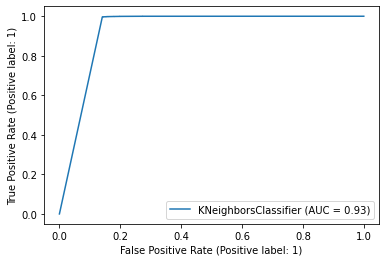

In [85]:
plot_confusion_matrix(Model_KNN, X_test, y_test)
plot_confusion_matrix(Model_KNN, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_pred, y_test=y_test, y_test_predict=y_test_pred)

# Get the ROV curve
display = plot_roc_curve(Model_KNN, X_test, y_test)

### 9.Decision Tree

In [654]:
# Find the optimal parameters for Decision Tree model 

Model_Tree = DecisionTreeClassifier(random_state=42)
param_grids  = {
    'max_depth':[4, 6, 8, 10, 12]
}
GridSearch_Tree = GridSearchCV(estimator=Model_Tree, param_grid=param_grids, cv=3, verbose=1,scoring='roc_auc')
GridSearch_Tree.fit(X_train, y_train)

print('Best Parameters for Decision Tree Model')
print(GridSearch_Tree.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for Decision Tree Model
{'max_depth': 10}


In [86]:
# The best Decision Tree Model
Model_Tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Fit the best Decision Tree model to the training set
Model_Tree.fit(X_train, y_train)

# Get the predicted value
y_train_pred = Model_Tree.predict(X_train)
y_test_pred = Model_Tree.predict(X_test)



train_accuracy: 0.9999918784547587
test_accuracy: 0.9999693186207096
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



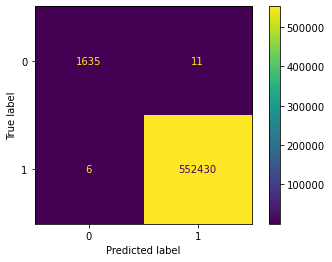

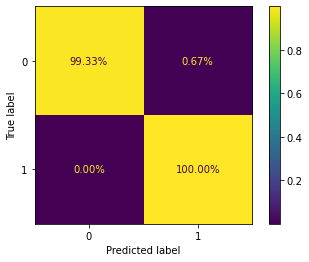

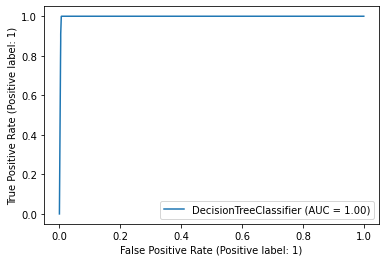

In [87]:
plot_confusion_matrix(Model_Tree, X_test, y_test)
plot_confusion_matrix(Model_Tree, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_pred, y_test=y_test, y_test_predict=y_test_pred)

# Get the ROV curve
display = plot_roc_curve(Model_Tree, X_test, y_test)

### 10.Random Forest

In [657]:
# Find the optimal parameters for Random Forest model 
Model_RF = RandomForestClassifier(random_state=10)

param_grids = { 'max_depth' : [8, 10, 12]}


GridSearch_RF = GridSearchCV(estimator=Model_RF, param_grid=param_grids, cv=3, verbose=1,scoring='roc_auc')
GridSearch_RF.fit(X_train, y_train)

print('Best Parameters for Random Forest Model')
print(GridSearch_RF.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Random Forest Model
{'max_depth': 12}


In [88]:

Model_RF = RandomForestClassifier(max_depth=12,random_state=42)

# Fit the best Random Forest model to the training set
Model_RF.fit(X_train, y_train)

# Get the predicted value
y_train_pred = Model_RF.predict(X_train)
y_test_pred = Model_RF.predict(X_test)

train_accuracy: 0.999990976060843
test_accuracy: 0.999978342555795
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



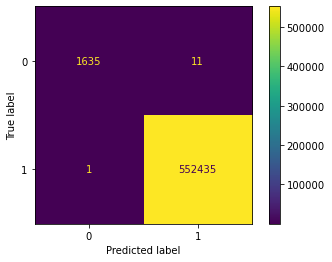

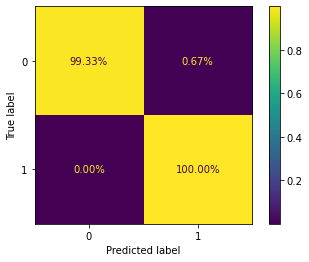

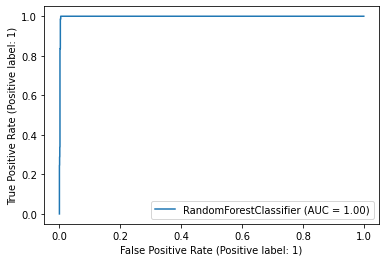

In [89]:
plot_confusion_matrix(Model_RF, X_test, y_test)
plot_confusion_matrix(Model_RF, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_pred, y_test=y_test, y_test_predict=y_test_pred)

# Get the ROV curve
display = plot_roc_curve(Model_RF, X_test, y_test)

### 11.XGboost

In [90]:
# The best XGboost Model
Model_XGB = XGBClassifier(max_depth=4,
                      n_estimators=250,
                      min_child_weight=2, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42,
                      gamma=0.1,
                      eval_metric=['logloss','auc','error'])

# Fit the best XGboost model to the training set
Model_XGB.fit(X_train, y_train)

# Get the predicted value
y_train_pred = Model_XGB.predict(X_train)
y_test_pred = Model_XGB.predict(X_test)

train_accuracy: 0.999985110500391
test_accuracy: 0.9999711234077266
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



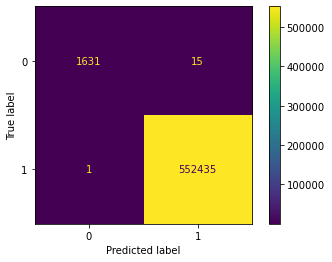

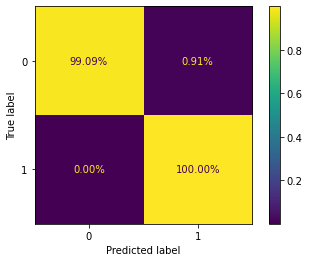

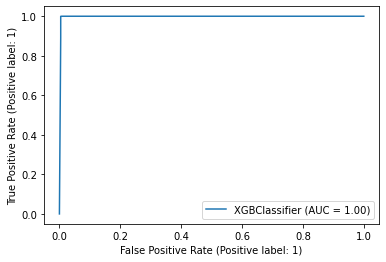

In [91]:
plot_confusion_matrix(Model_XGB, X_test, y_test)
plot_confusion_matrix(Model_XGB, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_pred, y_test=y_test, y_test_predict=y_test_pred)

# Get the ROV curve
display = plot_roc_curve(Model_XGB, X_test, y_test)

### 12.MLP

In [669]:
# Find the optimal parameters
Model_MLP = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000,random_state=42)

param_grids = { 'activation' : ["relu","logistic"],"solver":["adam","sgd","lbfgs"]}


GridSearch_MLP = GridSearchCV(estimator=Model_MLP, param_grid=param_grids, cv=3, verbose=1,scoring='roc_auc')
GridSearch_MLP.fit(X_train, y_train)

print('Best Parameters for MLP Model')
print(GridSearch_MLP.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for MLP Model
{'activation': 'relu', 'solver': 'adam'}


In [92]:
# MLP

Model_MLP = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000,random_state=42,activation='relu',solver='adam')

# Fit the best Random Forest model to the training set
Model_MLP.fit(X_train, y_train)

# Get the predicted value
y_train_pred = Model_MLP.predict(X_train)
y_test_pred = Model_MLP.predict(X_test)


train_accuracy: 0.9993904329099451
test_accuracy: 0.9994062250713793
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       0.99      0.91      0.95    554082
weighted avg       1.00      1.00      1.00    554082



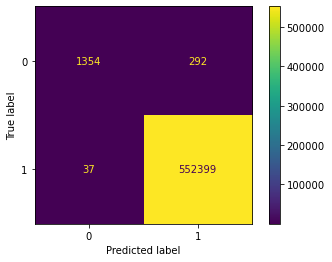

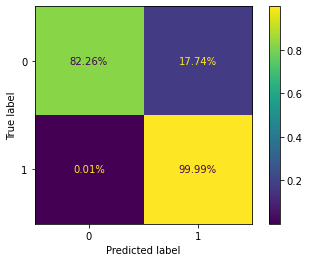

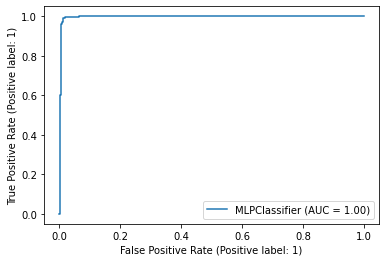

In [93]:

plot_confusion_matrix(Model_MLP, X_test, y_test)
plot_confusion_matrix(Model_MLP, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_pred, y_test=y_test, y_test_predict=y_test_pred)

# Get the ROV curve
display = plot_roc_curve(Model_MLP, X_test, y_test)

### 13.Logistic Regression

In [48]:
Log_model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
Log_model.fit(X_train, y_train)
y_train_predict = Log_model.predict(X_train)
y_test_predict = Log_model.predict(X_test)

train_accuracy: 0.9984181034657792
test_accuracy: 0.9984424688042564
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       0.95      0.76      0.83    554082
weighted avg       1.00      1.00      1.00    554082



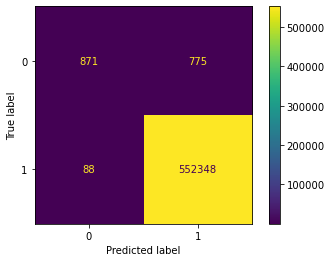

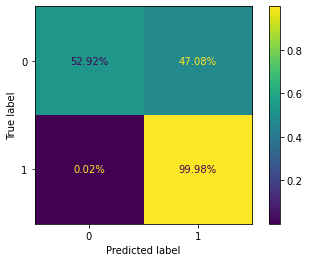

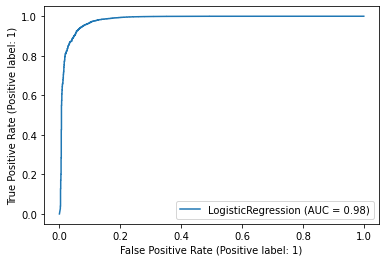

In [51]:

plot_confusion_matrix(Log_model, X_test, y_test)
plot_confusion_matrix(Log_model, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_predict, y_test=y_test, y_test_predict=y_test_predict)

# Get the ROV curve
display = plot_roc_curve(Log_model, X_test, y_test)

### 13.Logistic Regression

In [35]:
Log_model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
Log_model.fit(X_train, y_train)
y_train_predict = Log_model.predict(X_train)
y_test_predict = Log_model.predict(X_test)

train_accuracy: 0.9984181034657792
test_accuracy: 0.9984424688042564
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      1646
           1       1.00      1.00      1.00    552436

    accuracy                           1.00    554082
   macro avg       0.95      0.76      0.83    554082
weighted avg       1.00      1.00      1.00    554082



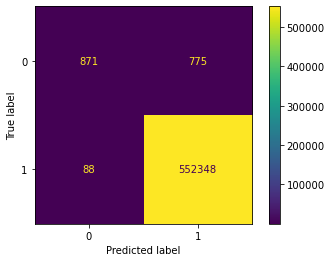

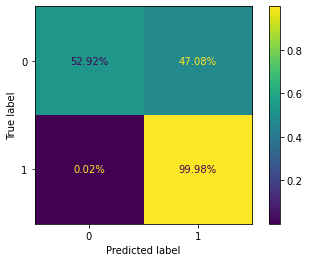

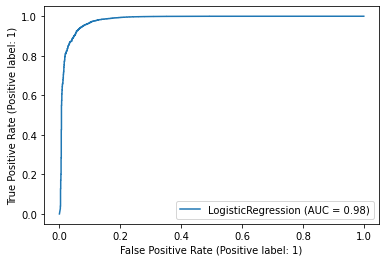

In [36]:

plot_confusion_matrix(Log_model, X_test, y_test)
plot_confusion_matrix(Log_model, X_test, y_test, values_format= '.2%', normalize='true')

results(y_train=y_train, y_train_predict= y_train_predict, y_test=y_test, y_test_predict=y_test_predict)

# Get the ROV curve
display = plot_roc_curve(Log_model, X_test, y_test)